# What is Fuel Economy?

[Wikipedia](https://en.wikipedia.org/wiki/Fuel_economy_in_automobiles): The fuel economy of an automobile is the fuel efficiency relationship between the distance traveled and the amount of fuel consumed by the vehicle. Consumption can be expressed in terms of volume of fuel to travel a distance, or the distance travelled per unit volume of fuel consumed.

![img](fuel-consumption.png)

- Fuel Economy : [Information](https://www.epa.gov/compliance-and-fuel-economy-data/data-cars-used-testing-fuel-economy)
- Fuel Economy: [Dataset](https://www.fueleconomy.gov/feg/download.shtml/)
    - [Data Description](http://www.fueleconomy.gov/feg/epadata/Readme.txt)
    - [PDF](http://www.fueleconomy.gov/feg/EPAGreenGuide/GreenVehicleGuideDocumentation.pdf)

--------------

# 1.Accessing Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_2008 = pd.read_csv("Data/all_alpha_08.csv")
df_2018 = pd.read_csv("Data/all_alpha_18.csv")

In [3]:
#number of samples in each dataset
print("Data Size:")
df_2008.size, df_2018.size

Data Size:


(43272, 28998)

In [4]:
# number of columns in each dataset
print("Numer of rows and columns:")
df_2008.shape, df_2018.shape

Numer of rows and columns:


((2404, 18), (1611, 18))

In [5]:
# duplicate rows in each dataset
print("Duplicate information 2008: ", df_2008.duplicated().sum())
print("Duplicate information 2018: ", df_2018.duplicated().sum())

Duplicate information 2008:  25
Duplicate information 2018:  0


In [6]:
# datatypes of columns
print("Datatypes information: ")
df_2008.info()

Datatypes information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2404 non-null   object 
 1   Displ                 2404 non-null   float64
 2   Cyl                   2205 non-null   object 
 3   Trans                 2205 non-null   object 
 4   Drive                 2311 non-null   object 
 5   Fuel                  2404 non-null   object 
 6   Sales Area            2404 non-null   object 
 7   Stnd                  2404 non-null   object 
 8   Underhood ID          2404 non-null   object 
 9   Veh Class             2404 non-null   object 
 10  Air Pollution Score   2404 non-null   object 
 11  FE Calc Appr          2205 non-null   object 
 12  City MPG              2205 non-null   object 
 13  Hwy MPG               2205 non-null   object 
 14  Cmb MPG               2205 non-null   object 
 1

In [7]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 1611 non-null   object 
 1   Displ                 1609 non-null   float64
 2   Cyl                   1609 non-null   float64
 3   Trans                 1611 non-null   object 
 4   Drive                 1611 non-null   object 
 5   Fuel                  1611 non-null   object 
 6   Cert Region           1611 non-null   object 
 7   Stnd                  1611 non-null   object 
 8   Stnd Description      1611 non-null   object 
 9   Underhood ID          1611 non-null   object 
 10  Veh Class             1611 non-null   object 
 11  Air Pollution Score   1611 non-null   int64  
 12  City MPG              1611 non-null   object 
 13  Hwy MPG               1611 non-null   object 
 14  Cmb MPG               1611 non-null   object 
 15  Greenhouse Gas Score 

In [8]:
# features with missing values
print("Features with missing values for 2008: ", df_2008.isnull().sum())

Features with missing values for 2008:  Model                     0
Displ                     0
Cyl                     199
Trans                   199
Drive                    93
Fuel                      0
Sales Area                0
Stnd                      0
Underhood ID              0
Veh Class                 0
Air Pollution Score       0
FE Calc Appr            199
City MPG                199
Hwy MPG                 199
Cmb MPG                 199
Unadj Cmb MPG           199
Greenhouse Gas Score    199
SmartWay                  0
dtype: int64


In [9]:
print("Features with missing values for 2018: ", df_2018.isna().sum())

Features with missing values for 2018:  Model                   0
Displ                   2
Cyl                     2
Trans                   0
Drive                   0
Fuel                    0
Cert Region             0
Stnd                    0
Stnd Description        0
Underhood ID            0
Veh Class               0
Air Pollution Score     0
City MPG                0
Hwy MPG                 0
Cmb MPG                 0
Greenhouse Gas Score    0
SmartWay                0
Comb CO2                0
dtype: int64


In [10]:
# number of non-null unique values for features in each dataset
# what those unique values are and counts for each
print("Number of non null unique values for features 2008: ", df_2008.nunique())

Number of non null unique values for features 2008:  Model                   436
Displ                    47
Cyl                       8
Trans                    14
Drive                     2
Fuel                      5
Sales Area                3
Stnd                     12
Underhood ID            343
Veh Class                 9
Air Pollution Score      13
FE Calc Appr              2
City MPG                 39
Hwy MPG                  43
Cmb MPG                  38
Unadj Cmb MPG           721
Greenhouse Gas Score     20
SmartWay                  2
dtype: int64


In [11]:
# number of non-null unique values for features in each dataset
# what those unique values are and counts for each
print("Number of non null unique values for features 2018: ", df_2018.nunique())

Number of non null unique values for features 2018:  Model                   367
Displ                    36
Cyl                       7
Trans                    26
Drive                     2
Fuel                      5
Cert Region               2
Stnd                     19
Stnd Description         19
Underhood ID            230
Veh Class                 9
Air Pollution Score       6
City MPG                 58
Hwy MPG                  62
Cmb MPG                  57
Greenhouse Gas Score     10
SmartWay                  3
Comb CO2                299
dtype: int64


--------------

# 2. Cleaning Data

## 2.1. Drop Extra columns

In [12]:
df_2008.drop(["Stnd", "Underhood ID", "FE Calc Appr", "Unadj Cmb MPG"], axis = 1, inplace = True)

In [13]:
df_2008.head(2)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,15,20,17,4,no


In [14]:
df_2018.drop(["Stnd", "Stnd Description", "Underhood ID", "Comb CO2"], axis = 1, inplace = True)

In [15]:
df_2018.head(2)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,small SUV,3,20,28,23,5,No


## 2.2. Rename the columns

In [16]:
#make column name consistent between two data sets
df_2008.rename(columns = {"Sales Area": "Cert Region"}, inplace = True)
df_2008.head(2)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,15,20,17,4,no


In [17]:
# replace space with underscore _ and lowercase for all column names
df_2008.rename(columns = lambda x: x.strip().lower().replace(" ", "_"), inplace = True)
df_2008.head(2)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,15,20,17,4,no


In [18]:
df_2018.rename(columns = lambda x : x.strip().lower().replace(" ", "_"), inplace = True)
df_2018.head(2)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,small SUV,3,20,28,23,5,No


In [19]:
# confirm all columns between 2008 and 2018 are identical
(df_2008.columns == df_2018.columns).all()

True

In [20]:
# save the progress datasets
df_2008.to_csv("Data/data_08.csv", index = False)
df_2018.to_csv("Data/data_18.csv", index = False)

---------

# 3. Filter, Drop Nulls, Dedupe

## 3.1. Filter only for california region

For consistency, only compare cars certified by California standards. Filter both datasets using query to select only rows where cert_region is CA. Then, drop the cert_region columns, since it will no longer provide any useful information (we'll know every value is 'CA').

In [21]:
# get only for CA region
df_2008.head(2)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,15,20,17,4,no


In [22]:
df_2008 = df_2008.query('cert_region == "CA"')
df_2008.head(2)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,17,22,19,5,no


In [23]:
df_2008.drop("cert_region", axis=1, inplace=True)
df_2008.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,SUV,7,17,22,19,5,no


In [24]:
# 2018 dataset
df_2018 = df_2018.query('cert_region == "CA"')
df_2018.head(2)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,small SUV,3,20,28,23,5,No
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,small SUV,3,19,27,22,4,No


In [25]:
df_2018.drop("cert_region", axis = 1, inplace = True)
df_2018.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,small SUV,3,20,28,23,5,No
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,small SUV,3,19,27,22,4,No


## 3.2. Drop Nulls

Drop any rows in both datasets that contain missing values.

In [26]:
# 2008 data, check for na values
df_2008.isnull().sum()

model                    0
displ                    0
cyl                     75
trans                   75
drive                   37
fuel                     0
veh_class                0
air_pollution_score      0
city_mpg                75
hwy_mpg                 75
cmb_mpg                 75
greenhouse_gas_score    75
smartway                 0
dtype: int64

In [27]:
# drop null values rows
df_2008.dropna(axis=0, inplace = True)

In [28]:
# checks if any of columns in 2008 have null values - should print False
df_2008.isna().sum().any()

False

In [29]:
# 2018 data
df_2018.dropna(axis = 0, inplace = True)
df_2018.isnull().sum().any()

False

## 3.3. Dedupe
Drop any duplicate rows in both datasets.

In [30]:
# check for duplicate rows
print("duplicated rows for 2008: ", df_2008.duplicated().sum())
print("duplicated rows for 2018: ", df_2018.duplicated().sum())

duplicated rows for 2008:  23
duplicated rows for 2018:  3


In [31]:
# drop the duplicate rows for 2008 data
df_2008.drop_duplicates(inplace = True)

In [32]:
# print number of duplicates again to confirm dedupe - should be 0
df_2008.duplicated().sum()

0

In [33]:
# save the progress data
df_2008.to_csv("Data/data_08.csv", index = False)
df_2018.to_csv("Data/data_18.csv", index = False)

------------

# 4. Inspecting Data Types

inspect the datatypes of features in each dataset and think about what changes should be made to make them practical and consistent (in both datasets).

In [34]:
df_2008.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,SUV,7,17,22,19,5,no


In [35]:
df_2018.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,small SUV,3,20,28,23,5,No
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,small SUV,3,19,27,22,4,No


In [36]:
df_2008.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 986 entries, 0 to 2400
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 986 non-null    object 
 1   displ                 986 non-null    float64
 2   cyl                   986 non-null    object 
 3   trans                 986 non-null    object 
 4   drive                 986 non-null    object 
 5   fuel                  986 non-null    object 
 6   veh_class             986 non-null    object 
 7   air_pollution_score   986 non-null    object 
 8   city_mpg              986 non-null    object 
 9   hwy_mpg               986 non-null    object 
 10  cmb_mpg               986 non-null    object 
 11  greenhouse_gas_score  986 non-null    object 
 12  smartway              986 non-null    object 
dtypes: float64(1), object(12)
memory usage: 107.8+ KB


In [37]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797 entries, 1 to 1609
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 797 non-null    object 
 1   displ                 797 non-null    float64
 2   cyl                   797 non-null    float64
 3   trans                 797 non-null    object 
 4   drive                 797 non-null    object 
 5   fuel                  797 non-null    object 
 6   veh_class             797 non-null    object 
 7   air_pollution_score   797 non-null    int64  
 8   city_mpg              797 non-null    object 
 9   hwy_mpg               797 non-null    object 
 10  cmb_mpg               797 non-null    object 
 11  greenhouse_gas_score  797 non-null    int64  
 12  smartway              797 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 87.2+ KB


## Inspecting Results:

- we can make data consistency for `cyl` column, using int data type
-  for `air pollution` column, we can convert to float data type
-  for `city_mpg` , `hwy_mpg`, `cmb_mpg` - need to convert them to float data type
- for `greenhouse_gas_score` column, need to conver it to int data type

-------------

# 5. Fixing Data Types

## 5.1. Fix `cyl` datatype
- 2008: extract int from string.
- 2018: convert float to int.

### 2008: extract int from string.

In [38]:
# check value counts for the 2008 cyl column
df_2008["cyl"].value_counts()

(6 cyl)     409
(4 cyl)     283
(8 cyl)     199
(5 cyl)      48
(12 cyl)     30
(10 cyl)     14
(2 cyl)       2
(16 cyl)      1
Name: cyl, dtype: int64

In [39]:
df_2008.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,SUV,7,17,22,19,5,no


In [40]:
# df_2008["cyl"].str[1:-5].astype(int)

df_2008['cyl'] = df_2008['cyl'].str.extract('(\d+)').astype(int)

In [41]:
df_2008.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no
2,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7,17,22,19,5,no


In [42]:
#confirm the value counts of cyl again
df_2008["cyl"].value_counts()

6     409
4     283
8     199
5      48
12     30
10     14
2       2
16      1
Name: cyl, dtype: int64

### 2018: convert float to int.

In [43]:
df_2018.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,small SUV,3,20,28,23,5,No
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,small SUV,3,19,27,22,4,No


In [44]:
df_2018["cyl"] = df_2018["cyl"].astype(int)

In [45]:
df_2018["cyl"].dtype

dtype('int32')

In [46]:
# save the progress data
df_2008.to_csv("Data/data_08.csv", index = False)
df_2018.to_csv("Data/data_18.csv", index = False)

----------

## 5.2. Fix `air_pollution_score` datatype

- 2008: convert string to float.
- 2018: convert int to float.

#### 2008: convert string to float.

In [47]:
df_2008.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no
2,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7,17,22,19,5,no


In [48]:
df_2008["air_pollution_score"] = df_2008["air_pollution_score"].astype(float)

ValueError: could not convert string to float: '6/4'

In [49]:
# check error happening row value
err_position = df_2008.query('air_pollution_score == "6/4"')
err_position

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


According to [resource](http://www.fueleconomy.gov/feg/findacarhelp.shtml#airPollutionScore),

- If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type.

### Findings
so we need to check for those cars which can have more than one type of fuel. The above car is using `fuel = ethanol/gas`

Columns with `/` for holding more than 2 values as string:
- fuel
- air_pollution_score
- city_mpg
- hwy_mpg
- cmb_mpg
- greenhouse_gas_score

#### get all hybirds in 2008

In [50]:
hb_2008 = df_2008[df_2008["fuel"].str.contains("/")]
hb_2008.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [51]:
# get all hybrids in 2018
hb_2018 = df_2018[df_2018["fuel"].str.contains("/")]
hb_2018.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No


As each row needs to be split into two rows; One for each specific fuel type (separated by `/`)

In [52]:
# create two copies of 2008 hybrid df
df1 = hb_2008.copy() # data on first fuel type of each hybrid vehicle
df2 = hb_2008.copy() # data on second fuel type of each hybrid vehicle

In [53]:
# affected columns process
columns_to_be_splited = ["fuel", "air_pollution_score", "city_mpg", "hwy_mpg", "cmb_mpg", "greenhouse_gas_score"]

# split each column
for col in columns_to_be_splited:
    df1[col] = df1[col].apply(lambda x: x.split("/")[0]) # first fuel type value
    df2[col] = df2[col].apply(lambda x: x.split("/")[1]) # second fuel type value value

In [54]:
df1.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no


In [55]:
df2.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [56]:
# combine dataframes to add to the original dataframe
new_rows = df1.append(df2)

# now we have separate rows for each fuel type of each vehicle!
new_rows

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [57]:
# drop the original hybrid rows
df_2008.drop(hb_2008.index, inplace = True)

# add newly fixed rows
df_2008 = df_2008.append(new_rows, ignore_index = True)

In [58]:
# recheck whether "/" values are gone
df_2008["fuel"].str.contains("/").sum()

0

In [59]:
df_2008.shape # 1 additional row for newly sperated one

(987, 13)

#### Repeat process for 2018: get all hybirds in 2018

In [60]:
# create two copies of 2018 hybrid df
df1 = hb_2018.copy()
df2 = hb_2018.copy()

In [61]:
# affected columns process
columns_to_be_splited = ["fuel", "city_mpg", "hwy_mpg", "cmb_mpg"]

# split each column
for col in columns_to_be_splited:
    df1[col] = df1[col].apply(lambda x: x.split("/")[0]) # first fuel type value
    df2[col] = df2[col].apply(lambda x: x.split("/")[1]) # second fuel type value value

In [62]:
# combine two df
new_rows = df1.append(df2)

# drop the original non sperated rows of hybrid datset from original 2018 dataset
df_2018.drop(hb_2018.index, inplace = True)

# append original 2018 dataset with newly created rows
df_2018 = df_2018.append(new_rows, ignore_index = True)

In [63]:
# check "/" still there or not
df_2018["fuel"].str.contains("/").sum()

0

In [64]:
df_2018.shape

(835, 13)

----------

### continue changes for `air_pollution_score`:
- 2008: convert string to float.
- 2018: convert int to float.

In [65]:
df_2008["air_pollution_score"] = df_2008["air_pollution_score"].astype(float)

In [66]:
df_2018["air_pollution_score"] = df_2018["air_pollution_score"].astype(float)

In [67]:
# save the progress
df_2008.to_csv("Data/data_08.csv", index = False)
df_2018.to_csv("Data/data_18.csv", index = False)

-------------

## 5.3. Fix `city_mpg`, `hwy_mpg`, `cmb_mpg` datatypes
- 2008 and 2018: convert string to float.

In [68]:
df_2008.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15,20,17,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17,22,19,5,no


In [69]:
df_2008["city_mpg"] = df_2008["city_mpg"].astype(float)

In [70]:
df_2008["hwy_mpg"] = df_2008["hwy_mpg"].astype(float)
df_2008["cmb_mpg"] = df_2008["cmb_mpg"].astype(float)

In [71]:
df_2018["city_mpg"] = df_2018["city_mpg"].astype(float)
df_2018["hwy_mpg"] = df_2018["hwy_mpg"].astype(float)
df_2018["cmb_mpg"] = df_2018["cmb_mpg"].astype(float)

--------

## 5.4. Fix `greenhouse_gas_score` datatype
- 2008: convert from float to int.

In [72]:
df_2008["greenhouse_gas_score"] = df_2008["greenhouse_gas_score"].astype(int)

In [73]:
# check all data type again
df_2008.dtypes

model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int32
smartway                 object
dtype: object

In [74]:
df_2018.dtypes

model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [75]:
df_2008.shape, df_2018.shape

((987, 13), (835, 13))

------------------

# 6. Exploring with Visuals

### 6.1. distributions of greenhouse gas score in 2008 and 2018

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
df_2008.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no


In [82]:
df_2018.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,3.5,6,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No


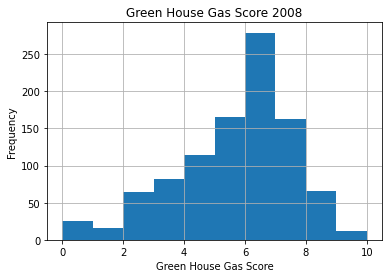

In [106]:
df_2008["greenhouse_gas_score"].hist();
plt.title("Green House Gas Score 2008")
plt.xlabel("Green House Gas Score")
plt.ylabel("Frequency");

As per the histogram above, 2008 Greenhouse Gas Score is left schewed.

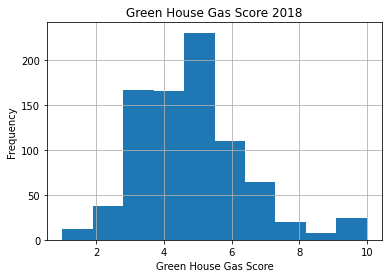

In [107]:
df_2018["greenhouse_gas_score"].hist();
plt.title("Green House Gas Score 2018")
plt.xlabel("Green House Gas Score")
plt.ylabel("Frequency");

As per the histogram above, 2018 Greenhouse Gas Score is right schewed.

-------

### 6.2. distribution of combined mpg changed from 2008 to 2018

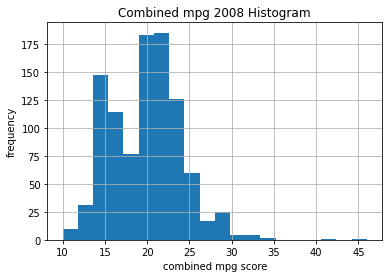

In [97]:
df_2008["cmb_mpg"].hist(bins = 20);
plt.title("Combined mpg 2008 Histogram")
plt.xlabel("combined mpg score")
plt.ylabel("frequency");

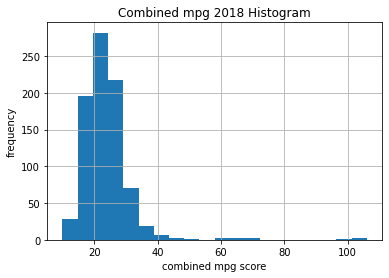

In [98]:
df_2018["cmb_mpg"].hist(bins = 20);
plt.title("Combined mpg 2018 Histogram")
plt.xlabel("combined mpg score")
plt.ylabel("frequency");

As per two histograms above, both 2008 and 2018 Combined MPG are both right schewed.

-------

### 6.3.correlation between displacement and combined mpg

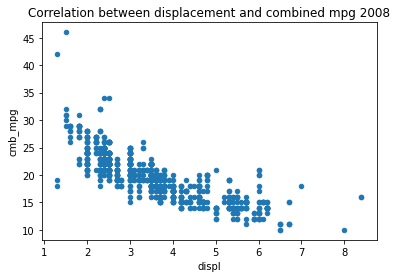

In [102]:
df_2008.plot(x="displ", y="cmb_mpg", kind="scatter");
plt.title("Correlation between displacement and combined mpg 2008");

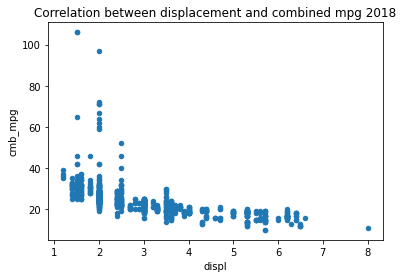

In [103]:
df_2018.plot(x="displ", y="cmb_mpg", kind="scatter");
plt.title("Correlation between displacement and combined mpg 2018");

As per two scatter plots above, there is negative correlation between displacement and combined mpg.

------

### 6.4. correlation between greenhouse gas score and combined mpg

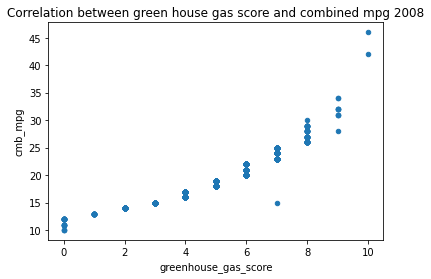

In [104]:
df_2008.plot(x="greenhouse_gas_score", y="cmb_mpg", kind="scatter");
plt.title("Correlation between green house gas score and combined mpg 2008");

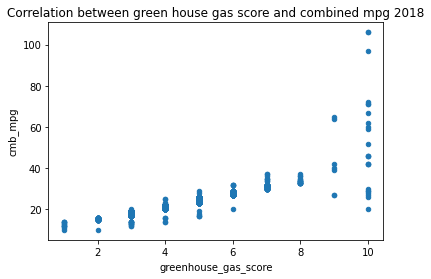

In [105]:
df_2018.plot(x="greenhouse_gas_score", y="cmb_mpg", kind="scatter");
plt.title("Correlation between green house gas score and combined mpg 2018");

As per two scatter plots above, there is positive correlation between displacement and combined mpg.

---------

# 7. Conclusions

### 7.1) Q: Are more unique models using alternative fuels in 2018 compared to 2008? By how much?

In [108]:
df_2008.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no


check the fuel usage across the years.

In [111]:
df_2008["fuel"].value_counts()

Gasoline    984
ethanol       1
CNG           1
gas           1
Name: fuel, dtype: int64

In [110]:
df_2018["fuel"].value_counts()

Gasoline       752
Ethanol         26
Gas             26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

#### Alternative Fuel classification: reference from [wikipeida](https://en.wikipedia.org/wiki/Alternative_fuel#:~:text=Alternative%20fuels%2C%20known%20as%20non,as%20artificial%20radioisotope%20fuels%20that)

- 2008 alternative fuels: Ethanol, CNG
- 2018 alternative fuels: Ethanol, Electricity

check the models per each fuel type across the years.

In [121]:
df_2008.groupby("fuel").count().model

fuel
CNG           1
Gasoline    984
ethanol       1
gas           1
Name: model, dtype: int64

In [119]:
# how many unique models used alternative sources of fuel in 2008
alternative_2008 = df_2008.query('fuel in ["CNG", "ethanol"]').model.nunique()
alternative_2008

2

In [120]:
df_2018.groupby("fuel").count().model

fuel
Diesel          19
Electricity     12
Ethanol         26
Gas             26
Gasoline       752
Name: model, dtype: int64

In [125]:
# how many unique models used alternative sources of fuel in 2018
alternative_2018 = df_2018.query('fuel in ["Ethanol", "Electricity"]').model.nunique()
alternative_2018

26

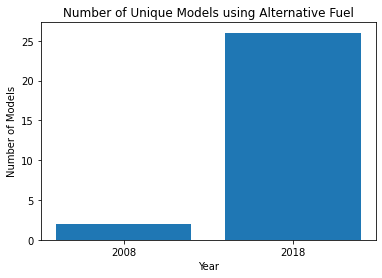

In [128]:
# plot the numbers
plt.bar(["2008", "2018"], [alternative_2008, alternative_2018]);
plt.xlabel("Year")
plt.ylabel("Number of Models")
plt.title("Number of Unique Models using Alternative Fuel");

24 more unique models have been using Alternative Fuel in 2018 since 2008. We can find the additional information such as proportion.

In [135]:
# get the total unique models for each year
total_2008 = df_2008.model.nunique()
total_2018 = df_2018.model.nunique()

print("Total unique model in 2008: ", total_2008)
print("Total unique model in 2018: ", total_2018)

Total unique model in 2008:  377
Total unique model in 2018:  357


In [137]:
# calculate the proportion of alternative fuels model , in each year
proportion_2008 = alternative_2008 / total_2008
proportion_2018 = alternative_2018 / total_2018

print("Proportion of Altrnative Fuel used Models in 2008: ", proportion_2008)
print("Proportion of Altrnative Fuel used Models in 2018: ", proportion_2018)

Proportion of Altrnative Fuel used Models in 2008:  0.005305039787798408
Proportion of Altrnative Fuel used Models in 2018:  0.07282913165266107


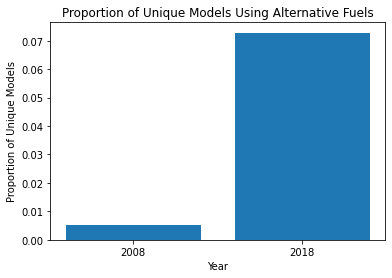

In [142]:
# plot the proportion
plt.bar(["2008", "2018"], [proportion_2008, proportion_2018]);
plt.title("Proportion of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Proportion of Unique Models");

-------

### 7.2) Q: How much have vehicle classes improved in fuel economy (increased in mpg)?

In [144]:
df_2008.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no


we can find the mean for each mpg per each vehicle classes, and compare it for both year.

In [148]:
vehicle_2008 = df_2008.groupby("veh_class").cmb_mpg.mean()

In [150]:
vehicle_2018 = df_2018.groupby("veh_class").cmb_mpg.mean()

In [153]:
# check the improvement
improvement = vehicle_2018 - vehicle_2008
improvement

veh_class
SUV                     NaN
large car          7.572727
midsize car        9.001251
minivan            3.917647
pickup             4.011430
small SUV               NaN
small car          7.048680
special purpose         NaN
standard SUV            NaN
station wagon      7.995238
van                     NaN
dtype: float64

In [154]:
# only interested in vehicle classes existed in both year
improvement.dropna(inplace = True)

In [155]:
improvement

veh_class
large car        7.572727
midsize car      9.001251
minivan          3.917647
pickup           4.011430
small car        7.048680
station wagon    7.995238
dtype: float64

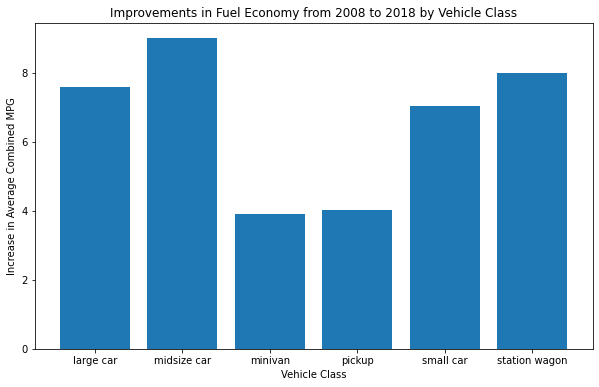

In [161]:
# plot the improvement
fig, ax = plt.subplots(figsize = (10, 6))
ax.bar(improvement.index, improvement);
plt.title("Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class")
plt.xlabel("Vehicle Class")
plt.ylabel("Increase in Average Combined MPG");

----------

### 7.3) Q: What are the characteristics of SmartWay vehicles? Have they changed over time? (mpg, greenhouse gas)

In [162]:
df_2008.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no


we can filter out the smartway vehicles and analyze them for each characteristics

In [165]:
df_2008.smartway.value_counts()

no     607
yes    380
Name: smartway, dtype: int64

In [171]:
smart_2008 = df_2008[df_2008["smartway"] == 'yes']
print("Total Number of Smarway Vehicles in 2008: ", smart_2008.shape[0])

smart_2008.head(2)

Total Number of Smarway Vehicles in 2008:  380


,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


In [168]:
df_2018.smartway.value_counts()

No       726
Yes       92
Elite     17
Name: smartway, dtype: int64

In [173]:
smart_2018 = df_2018.query('smartway in ["Yes", "Elite"]')
print("Total Number of Smarway Vehicles in 2018: ", smart_2018.shape[0])

smart_2018.head(2)

Total Number of Smarway Vehicles in 2018:  109


,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
16,AUDI A4 Ultra,2.0,4,AMS-7,2WD,Gasoline,small car,3.0,27.0,37.0,31.0,7,Yes
121,BUICK Encore,1.4,4,SemiAuto-6,2WD,Gasoline,small SUV,3.0,27.0,33.0,30.0,7,Yes


In [174]:
# check the characterctics for 2008
smart_2008.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [175]:
# check the characterctics for 2018
smart_2018.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,1.785321,3.935780,5.192661,34.853211,41.422018,37.302752,7.917431
std,0.407073,0.414444,1.802658,16.365516,13.045003,14.792080,1.195117
min,1.200000,3.000000,3.000000,25.000000,27.000000,26.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,36.000000,31.000000,7.000000
50%,1.600000,4.000000,5.000000,29.000000,37.000000,32.000000,7.000000
75%,2.000000,4.000000,7.000000,31.000000,40.000000,35.000000,9.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


#### Summary Findings

After comparing the mean value for each characteristics between 2008 and 2018, we can briefly say that the following
- Engine displacement, Number of Engine cylinders are getting smaller.
- Air pollution score (smog rating) is also getting decreased.
- city fuel economy, – highway fuel economy , combined city/highway fuel economy are getting more efficient.
- greenhouse gas score is getting improved.

----------

## 7.4) Q: What features are associated with better fuel economy (mpg)?

we will explore the top features asscoiated with better mpg, which are better than average mpg in each year.

In [178]:
top_2008 = df_2008.query('cmb_mpg > cmb_mpg.mean()')
top_2008.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,2.667823,4.890173,6.998073,20.317919,27.603083,22.992293,6.639692
std,0.665551,1.034856,1.159565,3.198257,3.051120,2.926371,0.804935
min,1.300000,4.000000,4.000000,17.000000,20.000000,20.000000,6.000000
25%,2.300000,4.000000,6.000000,18.000000,25.000000,21.000000,6.000000
50%,2.500000,4.000000,7.000000,20.000000,27.000000,22.000000,6.000000
75%,3.000000,6.000000,7.000000,21.000000,29.000000,24.000000,7.000000
max,6.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [179]:
top_2018 = df_2018.query('cmb_mpg > cmb_mpg.mean()')
top_2018.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000
mean,1.962918,4.021277,4.851064,27.477204,35.306991,30.413374,6.331307
std,0.398808,0.464768,1.860781,11.017182,9.011171,10.066211,1.408692
min,1.200000,3.000000,1.000000,21.000000,27.000000,25.000000,4.000000
25%,1.600000,4.000000,3.000000,23.000000,31.000000,26.000000,5.000000
50%,2.000000,4.000000,5.000000,25.000000,33.000000,28.000000,6.000000
75%,2.000000,4.000000,7.000000,28.000000,36.000000,31.000000,7.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


-----------

## 7.5) Q: For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which vehicle improved the most?

In [180]:
df_2008.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no


In [191]:
df_2008.model.value_counts()

NISSAN Altima                12
HONDA Accord                 11
FORD Ranger                  10
DODGE RAM 1500                9
SUBARU Legacy                 8
                             ..
BENTLEY Azure                 1
MERCEDES-BENZ E550 4Matic     1
MERCEDES-BENZ Maybach 62S     1
LEXUS ES 350                  1
ACURA RDX                     1
Name: model, Length: 377, dtype: int64

In [182]:
df_2018.model.value_counts()

FORD F150                        22
CHEVROLET Silverado 15           16
GMC Sierra 15                    16
GMC Yukon 1500                    8
JEEP Cherokee                     8
                                 ..
FERRARI GTC4Lusso                 1
MERCEDES-BENZ GLA 250             1
PORSCHE Macan GTS                 1
VOLKSWAGEN Beetle Convertible     1
AUDI A5 Cabriolet                 1
Name: model, Length: 357, dtype: int64

--------

# 8. Merging Datasets

## 8.1. Rename 2008 columns to distinguish from 2018 columns after the merge

In [192]:
# postfix with "_2008" for each columns
df_2008 = df_2008.rename(columns = lambda x : x[:10] + "_2008")
df_2008.head(2)

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,cmb_mpg_2008,greenhouse_2008,smartway_2008
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no


## 8.2. Perform inner merge

we are only interested in how the same model of car has been updated and how the new model's mpg compares to the old model's mpg.

In [193]:
df_combined = df_2008.merge(df_2018, left_on = "model_2008", right_on = "model", how = "inner")

In [195]:
# check the result
df_combined.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,...,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No
3,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-7,2WD,Gasoline,small car,7.0,26.0,35.0,29.0,6,No
4,AUDI A3,2.0,4,Auto-S6,2WD,Gasoline,station wagon,7.0,22.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No


In [196]:
# save the combined dataset , just for incase
df_combined.to_csv("Data/models_still_produced_2018.csv", index = False)

-------

In [205]:
# 1. Create a new dataframe, model_mpg, that contain the mean combined mpg values in 2008 and 2018 for each unique model
combined_model_mpg  = df_combined.groupby(["model"])[["cmb_mpg_2008", "cmb_mpg"]].mean()
combined_model_mpg.head()

,cmb_mpg_2008,cmb_mpg
model,,
ACURA RDX,19.000000,22.500000
AUDI A3,23.333333,28.000000
AUDI A4,21.000000,27.000000
AUDI A6,19.666667,25.666667
AUDI A8 L,16.500000,22.000000


In [206]:
# 2. Create a new column, mpg_change, with the change in mpg
combined_model_mpg["mpg_change"] = combined_model_mpg["cmb_mpg"] - combined_model_mpg["cmb_mpg_2008"]
combined_model_mpg.head()

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
ACURA RDX,19.000000,22.500000,3.500000
AUDI A3,23.333333,28.000000,4.666667
AUDI A4,21.000000,27.000000,6.000000
AUDI A6,19.666667,25.666667,6.000000
AUDI A8 L,16.500000,22.000000,5.500000


In [221]:
# 3. Find the vehicle that improved the most
combined_model_mpg.sort_values(by = "mpg_change", ascending = False)[0:1]

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
VOLVO XC 90,15.666667,32.2,16.533333


### Summary Findings:
VOLVO XC 90 is the best model that made the biggest improvement in combined mpg from 2008 to 2018. 

----------